In [ ]:
# Instala si no están disponibles
!pip install openpyxl seaborn

# Importa librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [ ]:
# Lee el archivo Excel (hoja de 2010-2011)
df = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")

# Elimina filas con datos faltantes clave
df = df.dropna(subset=["Customer ID", "Description", "InvoiceDate", "Price", "Quantity"])

# Convierte columnas y crea nuevas
df["Total"] = df["Quantity"] * df["Price"]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Month"] = df["InvoiceDate"].dt.to_period("M").astype(str)


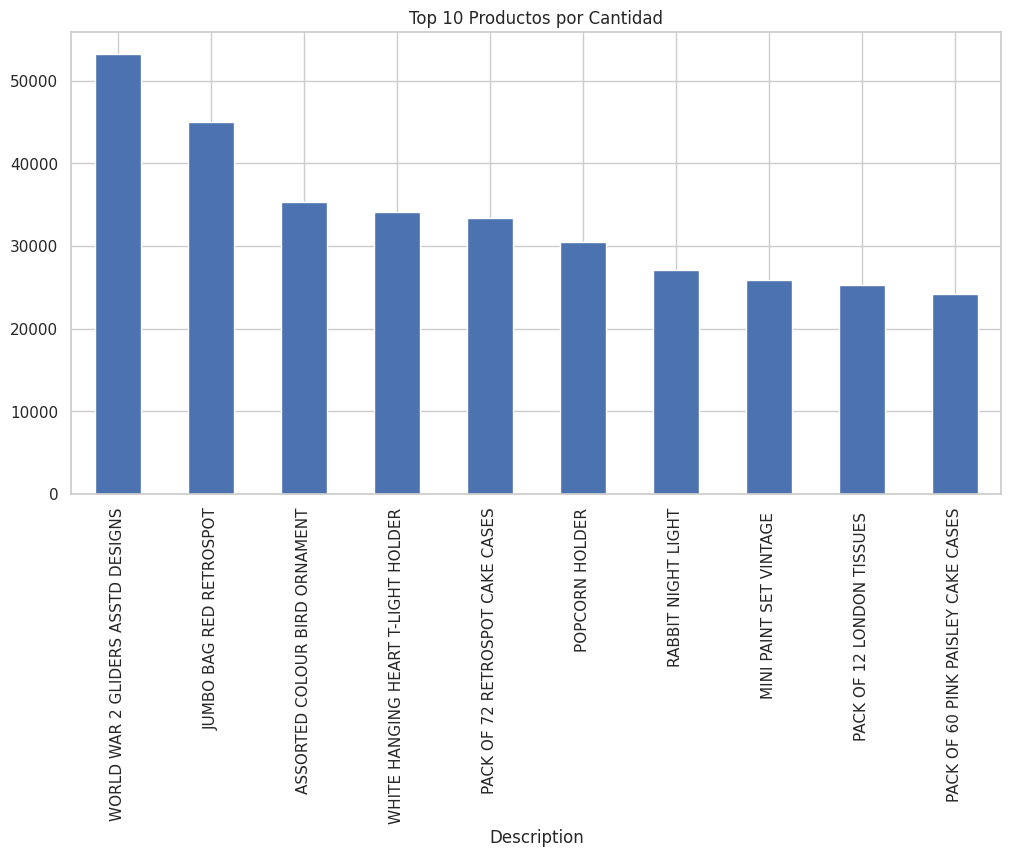

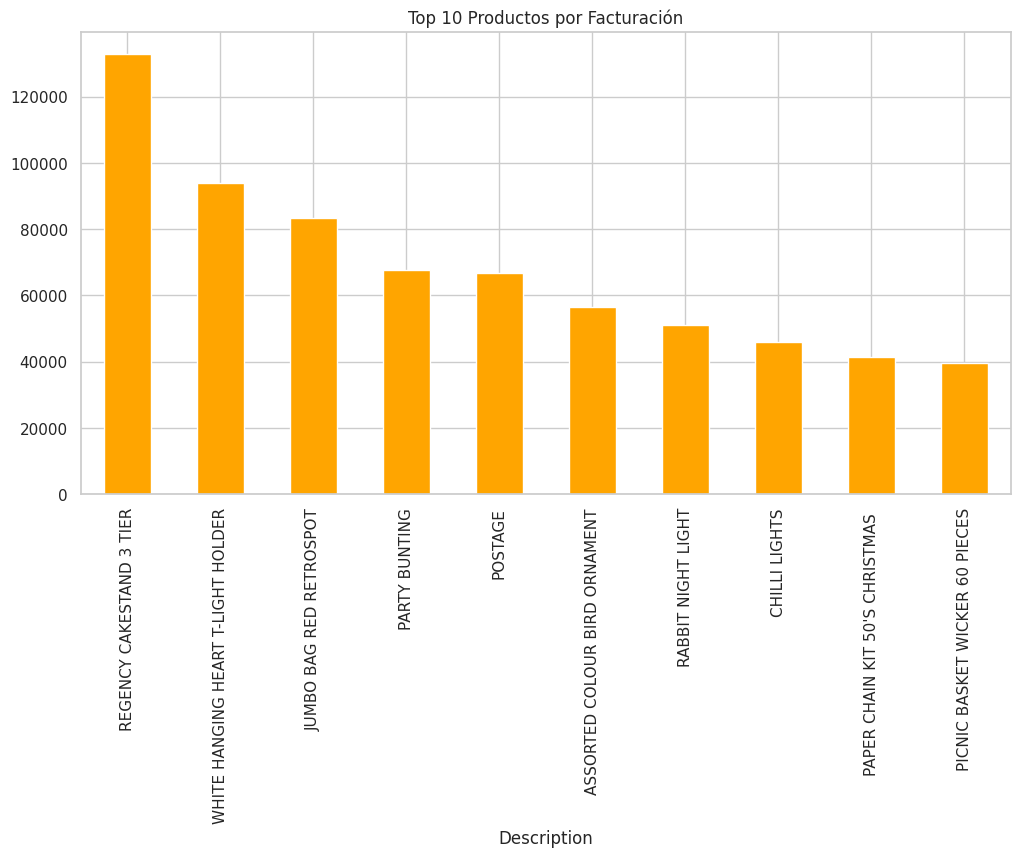

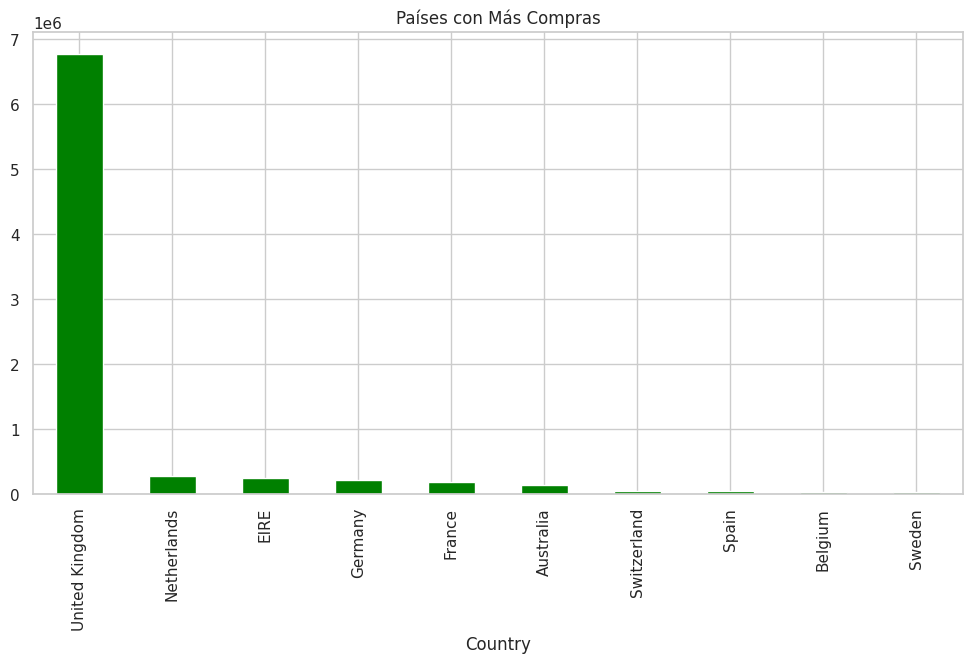

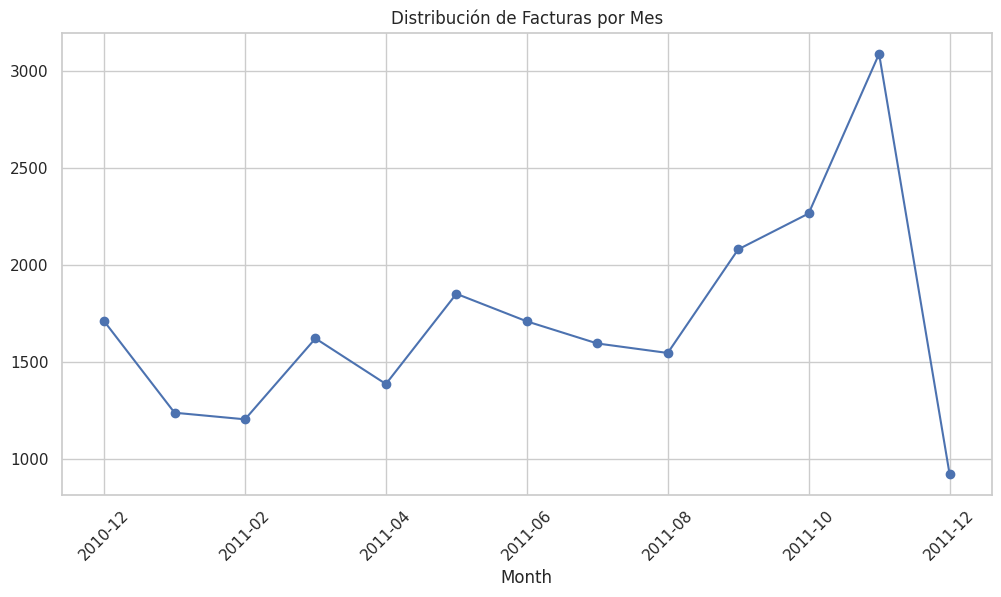

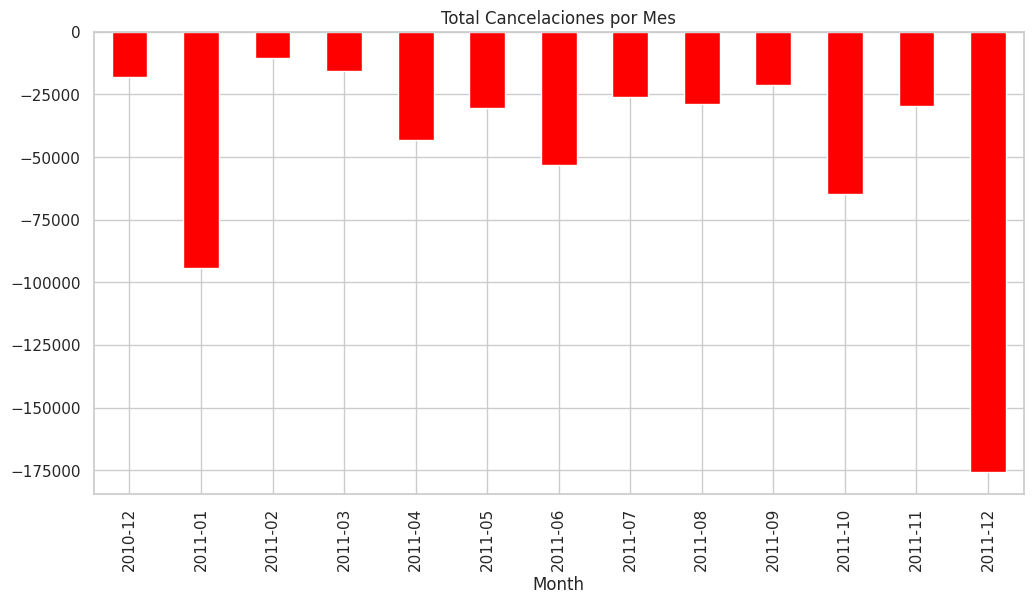

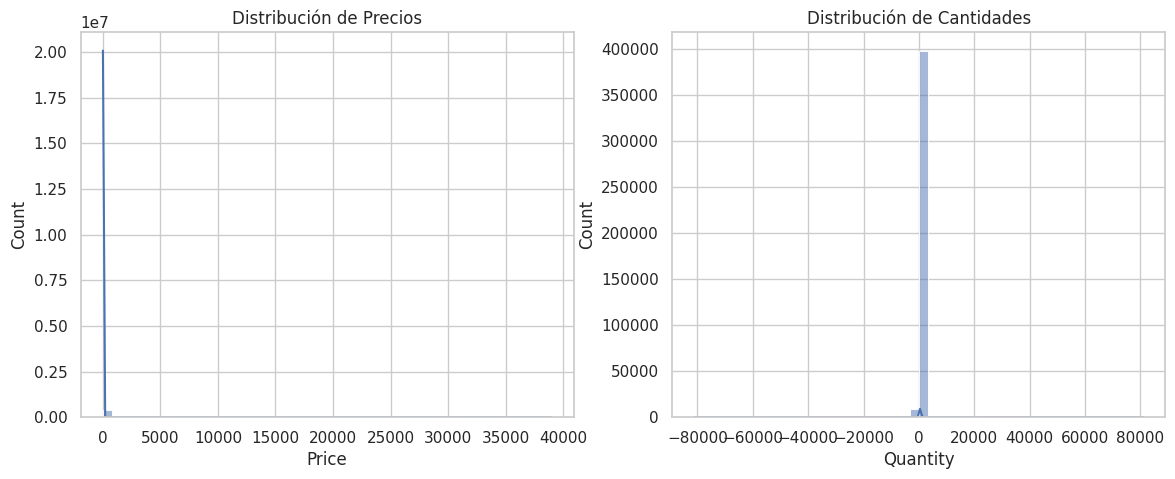

In [ ]:
# 1. Top 10 productos por cantidad
top_qty = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_qty.plot(kind="bar")
plt.title("Top 10 Productos por Cantidad")
plt.show()

# 2. Top 10 productos por facturación
top_fact = df.groupby("Description")["Total"].sum().sort_values(ascending=False).head(10)
top_fact.plot(kind="bar", color="orange")
plt.title("Top 10 Productos por Facturación")
plt.show()

# 3. Países con más compras
top_countries = df.groupby("Country")["Total"].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind="bar", color="green")
plt.title("Países con Más Compras")
plt.show()

# 4. Distribución de facturas por mes
monthly_sales = df.groupby("Month")["Invoice"].nunique()
monthly_sales.plot(kind="line", marker='o')
plt.title("Distribución de Facturas por Mes")
plt.xticks(rotation=45)
plt.show()

# 5. Cancelaciones (facturas con 'C')
cancelled = df[df["Invoice"].astype(str).str.startswith("C")]
cancel_total = cancelled.groupby("Month")["Total"].sum()
cancel_total.plot(kind="bar", color="red")
plt.title("Total Cancelaciones por Mes")
plt.show()

# 6. Histogramas de precios y cantidades
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df["Price"], bins=50, ax=axs[0], kde=True)
axs[0].set_title("Distribución de Precios")
sns.histplot(df["Quantity"], bins=50, ax=axs[1], kde=True)
axs[1].set_title("Distribución de Cantidades")
plt.show()
